In [238]:
#importem totes les llibreries necessaries
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import Normalizer
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [239]:
def createCorrMatrix(all_dataframe, var_list):
    """
    Printa una matriu de correlacio entre les variables de les dades que hem
    obtingut per veure quines d'aquestes estan mes relacionaes entre elles.
    """
    dataframe = all_dataframe.values
    dataframe = np.delete(dataframe, (0), axis=0)
    #Recollim els valors de cada variable, per tant, hem d'agafar cada variable com una
    #columna. Hem de fer la transposada de la matriu per aconseguir-ho amb la matriu de 
    #les dades de l'excel    
    dataframe_x = dataframe.transpose()
    output_values = dataframe_x[-2:]
    dataframe_x = dataframe_x[0:31]    
    dataframe_corr = np.concatenate([dataframe_x,output_values])
    m_corr = np.corrcoef(dataframe_corr.astype(float))
    plt.figure()
    sns.heatmap(m_corr, xticklabels=var_list, yticklabels=var_list)

In [240]:
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [241]:
def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

In [242]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[-n_train:]
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

In [243]:
def standarize(x_train, x_val):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    x_v = x_val - mean[None, :]
    x_v /= std[None, :]
    return x_t, x_v

In [244]:
def normalitzacio(x, y):
    #normalitzem
    x_mean = np.mean(x,axis=0)
    y_mean = np.mean(y)
    x_desvest = np.std(x,axis=0)
    y_desvest = np.std(y)
    x_norm = (x - x_mean) / x_desvest
    y_norm = (y - y_mean) / y_desvest
    return x_mean, x_desvest, x_norm, y_mean, y_desvest, y_norm

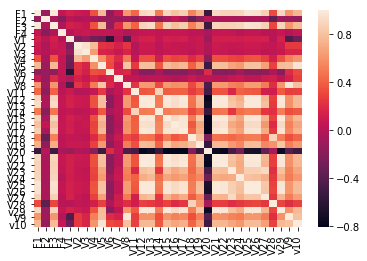

In [245]:
#Llegim totes les dades .csv
dataframe = pd.read_excel('Residential-Building-Data-Set.xlsx', sheetName=None)
#Llista amb el nom de les variables
var_list = ['F1', 'F2', 'F3', 'F4', 
                'V1','V2','V3','V4','V5','V6','V7','V8',
                'V11','V12','V13','V14','V15','V16',
                'V17','V18','V19','V20','V21','V22','V23','V24',
                'V25','V26','V27','V28','v29', 'V9', 'v10']
createCorrMatrix(dataframe, var_list)


In [246]:
def calcularErrorsTrainTest(x_train, y_train, x_val, y_val):
    for i in range(x_train.shape[1]):
        x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
        x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
        x_t = np.reshape(x_t,(x_t.shape[0],1))
        x_v = np.reshape(x_v,(x_v.shape[0],1))    
        regr = regression(x_t, y_train)    
        error = mean_squeared_error(y_val, regr.predict(x_v)) # calculem error
        r2 = r2_score(y_val, regr.predict(x_v))
        print("El cálculo del MSE: ")
        print(error)
        print("El cálculo del RMSD:")
        print(math.sqrt(error))
        print("El r2:")
        print(r2)
        print()
        return error, math.sqrt(error), r2

El cálculo del MSE: 
1325.095726121282
El cálculo del RMSD:
36.40186432205474
El r2:
0.9444766631924537

1899.3996520253525


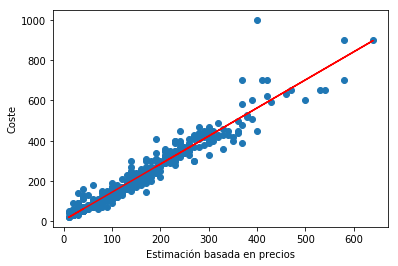

In [247]:
dataframe = pd.read_excel('Residential-Building-Data-Set.xlsx', sheetName=None)
dataframe = dataframe.values
dataframe = np.delete(dataframe, (0), axis=0)
dataframe_x = dataframe.transpose()
#Escollim els valors de output
output_values = dataframe_x[-2:]
#Variable de cost de construccio
y = output_values[-1]
#Variable x amb la que entrenem el model
x = dataframe_x[8]
atribut1 = x.reshape(x.shape[0], 1)
regr = regression(atribut1, y)
predicted = regr.predict(atribut1)

x_train, y_train, x_val, y_val = split_data(atribut1, y)
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)
mse = mean_squeared_error(y, predicted)
print(mse)
#Mostrem gràficament la regressió
plt.figure()
plt.ylabel("Coste")
plt.xlabel("Estimación basada en precios")
plt.scatter(x, y)
plt.plot(atribut1[:,0], predicted, 'r')


Com veiem a la gràfica, tenim un valor que està fent empitjorar l'error, que és un valor atípic que es dona en la coordenada 400-1000. Podem eliminar aquesta dada per fer aconseguir reduïr una mica l'error.

El cálculo del MSE: 
1397.0549693403705
El cálculo del RMSD:
37.37719852183107
El r2:
0.944290270831341



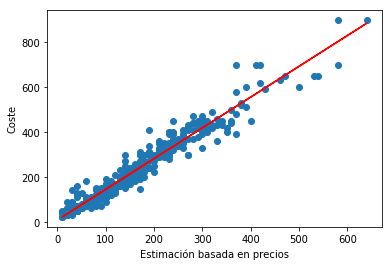

In [248]:
y = np.delete(y, 1)  
x = np.delete(x, 1)
atribut1 = x.reshape(x.shape[0], 1)
regr = regression(atribut1, y)
predicted = regr.predict(atribut1)
x_train, y_train, x_val, y_val = split_data(atribut1, y)
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)
#Mostrem gràficament la regressió
plt.figure()
plt.ylabel("Coste")
plt.xlabel("Estimación basada en precios")
plt.scatter(x, y)
plt.plot(atribut1[:,0], predicted, 'r')

<h3>Dada coordenada (400-1000) eliminada</h3>
Amb això aconseguim millorar el R2 y el MSE

(370, 1)
(370, 1)
El cálculo del MSE: 
[0.05800107]
El cálculo del RMSD:
0.24083411348715048
El r2:
0.940352946476151



/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


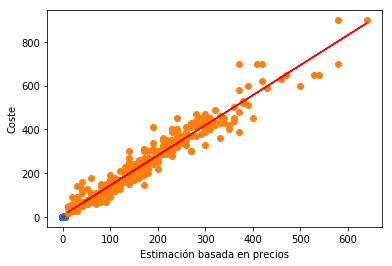

In [249]:
#estandaritzar dades de x
scaler = StandardScaler()
x_stand = x.reshape(x.shape[0], 1)
scaler.fit(x_stand)
tm = scaler.transform(x_stand)

#estandaritzar dades de y
y_stand = y.reshape(y.shape[0], 1)
scaler.fit(y_stand)
ty = scaler.transform(y_stand)

#eliminem dades que estorben en el resultat de l'error
tm = np.delete(tm, 1)
tm = tm.reshape(-1, 1)
print(tm.shape)
ty = np.delete(ty, 1)
ty = ty.reshape(-1, 1)
print(ty.shape)

#entrenem regresió i fem predicció
regr = regression(tm, ty)
predicted_standard = regr.predict(tm)

#dividim dades per a entrenament i validacio
x_train, y_train, x_val, y_val = split_data(tm, ty)

#calculem errors
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)

#Mostrem gràficament la regressió amb les dades estandaritzades
plt.figure()
plt.ylabel("Coste")
plt.xlabel("Estimación basada en precios")
plt.scatter(tm, ty)
plt.plot(tm[:,0], predicted_standard, 'r')

#Mostrem gràficament la regressió
plt.ylabel("Coste")
plt.xlabel("Estimación basada en precios")
plt.scatter(x, y)
plt.plot(atribut1[:,0], predicted, 'r')

El cálculo del MSE: 
18259.563238958293
El cálculo del RMSD:
135.12795136076878
El r2:
0.3569929501932655



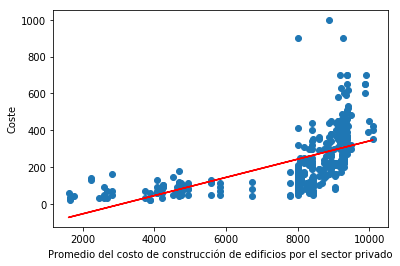

In [250]:
#Probes amb altres valors del conjunt
y = output_values[-1]
x = dataframe_x[25]
atribut1 = x.reshape(x.shape[0], 1)
regr = regression(atribut1, y)
predicted = regr.predict(atribut1)

x_train, y_train, x_val, y_val = split_data(atribut1, y)
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)
#Mostrem gràficament la regressió
plt.figure()
plt.ylabel("Coste")
plt.xlabel("Promedio del costo de construcción de edificios por el sector privado")
plt.scatter(x, y)
plt.plot(atribut1[:,0], predicted, 'r')

In [251]:
"""nx = 2
ny = 2
data = [["Hola","Adios"],[12,13],["Hola","Adios"],[12,13],["Hola","Adios"],[12,13],["Hola","Adios"],[12,13],["Hola","Adios"],[12,13]]
#data = np.random.randint(0,10,size=(ny,nx))

plt.figure()
tb = plt.table(cellText=data, loc=(0,0), cellLoc='center')

tc = tb.properties()['child_artists']
for cell in tc: 
    cell.set_height(1/10)
    cell.set_width(1/2)

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])"""

'nx = 2\nny = 2\ndata = [["Hola","Adios"],[12,13],["Hola","Adios"],[12,13],["Hola","Adios"],[12,13],["Hola","Adios"],[12,13],["Hola","Adios"],[12,13]]\n#data = np.random.randint(0,10,size=(ny,nx))\n\nplt.figure()\ntb = plt.table(cellText=data, loc=(0,0), cellLoc=\'center\')\n\ntc = tb.properties()[\'child_artists\']\nfor cell in tc: \n    cell.set_height(1/10)\n    cell.set_width(1/2)\n\nax = plt.gca()\nax.set_xticks([])\nax.set_yticks([])'

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Datos normalizados:
El cálculo del MSE: 
0.08056760211277007
El cálculo del RMSD:
0.28384432725134756
El r2:
0.9198893453315417


Datos sin normalizar:
El cálculo del MSE: 
1918.0708271782792
El cálculo del RMSD:
43.795785495619086
El r2:
0.9268902659019893



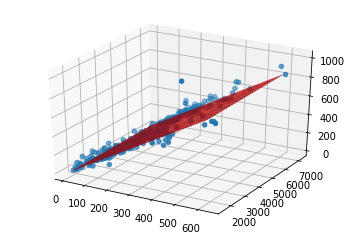

In [252]:
x = dataframe_x[0:31]
x = x.transpose()
x = x[:,[8, 12]].astype(float)           

#error = mean_squared_error(x,)
x_mean, x_desvest, x_norm, y_mean, y_desvest, y_norm = normalitzacio(x, y)
A = np.hstack((x_norm,np.ones([np.shape(x)[0],1])))
w = np.linalg.lstsq(A,y_norm)[0]

#Calcular regresio amb dades normalitzades
print("Datos normalizados:")
regr = regression(x_norm, y_norm)
predicted = regr.predict(x_norm)
x_train, y_train, x_val, y_val = split_data(x_norm, y_norm)
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)

#Calcular regresio amb dades sense normalitzar
print("\nDatos sin normalizar:")
regr = regression(x, y)
predicted = regr.predict(x)
x_train, y_train, x_val, y_val = split_data(x, y)
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x[:,0]) - min(x[:,0]))/2 + min(x[:,0])
malla_x2 =  malla * (max(x[:,1]) - min(x[:,1]))/2 + min(x[:,1])

#la fucnio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)
xplot_desnorm = (xplot - x_mean[0]) / x_desvest[0]
yplot_desnorm = (yplot - x_mean[1]) / x_desvest[1]

#ara creem la superficies que es un pla
zplot =y_desvest * (w[0] * xplot_desnorm + w[1] * yplot_desnorm+ w[2]) + y_mean 

#Dibuixem punts i superficie
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x[:,0],x[:,1],y)
plt.show()

In [253]:
#Agafem tots els valors
x = dataframe_x[0:31]
x = x.transpose()
#Agafem valor target
y = output_values[-1]
#Eliminem totes les variables que no ens aporten res
x = np.delete(x, 1, axis=0)
x = np.delete(x, 3, axis=0)
x = np.delete(x, 4, axis=0)
x = np.delete(x, 5, axis=0)
x = np.delete(x, 6, axis=0)
x = np.delete(x, 30, axis=0)
y = np.delete(y, 1)
y = np.delete(y, 3)
y = np.delete(y, 4)
y = np.delete(y, 5)
y = np.delete(y, 6)
y = np.delete(y, 30)

#estandaritzar dades de x
scaler = StandardScaler()
x_stand = x
scaler.fit(x_stand)
tm = scaler.transform(x_stand)

#estandaritzar dades de y
y_stand = y.reshape(y.shape[0], 1)
scaler.fit(y_stand)
ty = scaler.transform(y_stand)


#entrenem regresió i fem predicció
regr = regression(tm, ty)
predicted_standard = regr.predict(tm)

#dividim dades per a entrenament i validacio
x_train, y_train, x_val, y_val = split_data(tm, ty)

#calculem errors
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)

"""#Mostrem gràficament la regressió amb les dades estandaritzades
plt.figure()
plt.ylabel("Coste")
plt.xlabel("Estimación basada en precios")
plt.scatter(tm, ty)
plt.plot(tm[:,0], predicted_standard, 'r')

#Mostrem gràficament la regressió
plt.ylabel("Coste")
plt.xlabel("Estimación basada en precios")
plt.scatter(x, y)
plt.plot(atribut1[:,0], predicted, 'r')"""

El cálculo del MSE: 
[0.42287491]
El cálculo del RMSD:
0.6502883300928579
El r2:
0.5671665160281361



/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'#Mostrem gràficament la regressió amb les dades estandaritzades\nplt.figure()\nplt.ylabel("Coste")\nplt.xlabel("Estimación basada en precios")\nplt.scatter(tm, ty)\nplt.plot(tm[:,0], predicted_standard, \'r\')\n\n#Mostrem gràficament la regressió\nplt.ylabel("Coste")\nplt.xlabel("Estimación basada en precios")\nplt.scatter(x, y)\nplt.plot(atribut1[:,0], predicted, \'r\')'

In [254]:
#Prueba entrenamiento con 50% datos y validacion con 50% datos
#Agafem tots els valors
x = dataframe_x[8]
x = np.delete(x, 1)
y = output_values[-1]
y = np.delete(y, 1)
atribut1 = x.reshape(x.shape[0], 1)

#estandaritzar dades de x
scaler = StandardScaler()
x_stand = atribut1
scaler.fit(x_stand)
tm = scaler.transform(x_stand)

#estandaritzar dades de y
y_stand = y.reshape(y.shape[0], 1)
scaler.fit(y_stand)
ty = scaler.transform(y_stand)


#entrenem regresió i fem predicció
regr = regression(tm, ty)
predicted_standard = regr.predict(tm)

#dividim dades per a entrenament i validacio
x_train, y_train, x_val, y_val = split_data(tm, ty, 0.5)

#calculem errors
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)

#sin estandarizar
regr = regression(atribut1, y)
predicted2 = regr.predict(atribut1)
x_train, y_train, x_val, y_val = split_data(atribut1, y, 0.5)
calcularErrorsTrainTest(x_train, y_train, x_val, y_val)
regr = regression(x_train, y_train)
predicted2 = regr.predict(x_train)
predicted2 = predicted2.reshape(predicted2.shape[0], 1)

El cálculo del MSE: 
[0.0704369]
El cálculo del RMSD:
0.26539951045698446
El r2:
0.9328175913882937

El cálculo del MSE: 
1607.8122754086562
El cálculo del RMSD:
40.09753453030069
El r2:
0.9345687716726921



/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
